## **Amazon Musical Instruments Reviews-classification**



The data set contains 10,261 instrument reviews from Amazon Database with rating labeled from 1 to 5. 

**Task is to build a prediction model that will accurately classify which review are positive, Neutral and negative**

## **Steps:**
- Importing Libraries
- Uploading  dataset
- Analyze dataset
- Preprocessing data
 - Tokenize 
 - Text to sequence
 - Padding or truncating 
- Building model
- Training model and validating model

- Conclusion


## **Importing required Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Embedding

Using TensorFlow backend.


## **Uploading Dataset**

In [0]:
data = pd.read_csv('/content/Musical_instruments_reviews.csv')


In [3]:
#Display the top 5 rows and column
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [42]:
# Describe the data using describe method 
data.describe()

,overall
count,10261.000000
mean,1.858103
std,0.405060
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


In [0]:
# Deleting columns which will not required
del data['reviewerID']
del data['asin']
del data['reviewerName']
del data['helpful']
del data['unixReviewTime']
del data['reviewTime']

In [5]:
#Checking if columns were deleted
data.head()

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake
2,The primary job of this device is to block the...,5.0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.


## **Analyze Data**

- Make histogram by the frequency of words

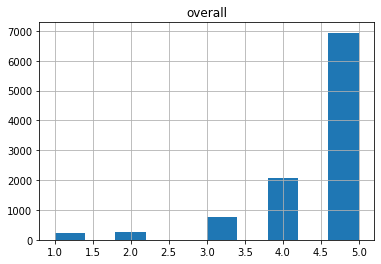

In [6]:
# Display hitogram of data rating "overall"
data.hist()
plt.show()

In [0]:
# Replacing ratings of 1 with 0 (not good) and 2,3 with 1 (neutral) and 4,5 with 2 (Good)
def sentiment_rating(rating):
    
    if(int(rating) == 1 ):
        return 0
    if(int(rating) == 3 or int(rating) == 2):
      return 1
    else: 
        return 2
data.overall = data.overall.apply(sentiment_rating) 

In [8]:
#Checking if values were updated
data.head()

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",2,good
1,The product does exactly as it should and is q...,2,Jake
2,The primary job of this device is to block the...,2,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,2,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,2,No more pops when I record my vocals.


In [9]:
#Show unique values of overall variable
data["overall"].unique()

array([2, 1, 0])

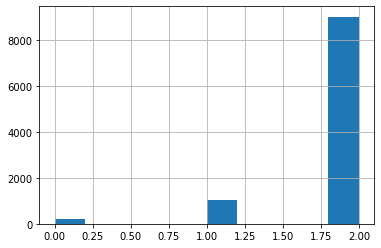

In [10]:
# Display histogram of overall variable
data["overall"].hist()

In [0]:
# Converting reviewText and summary to string type 
data['reviewText']=data['reviewText'].astype(str)
data['summary']=data['summary'].astype(str)

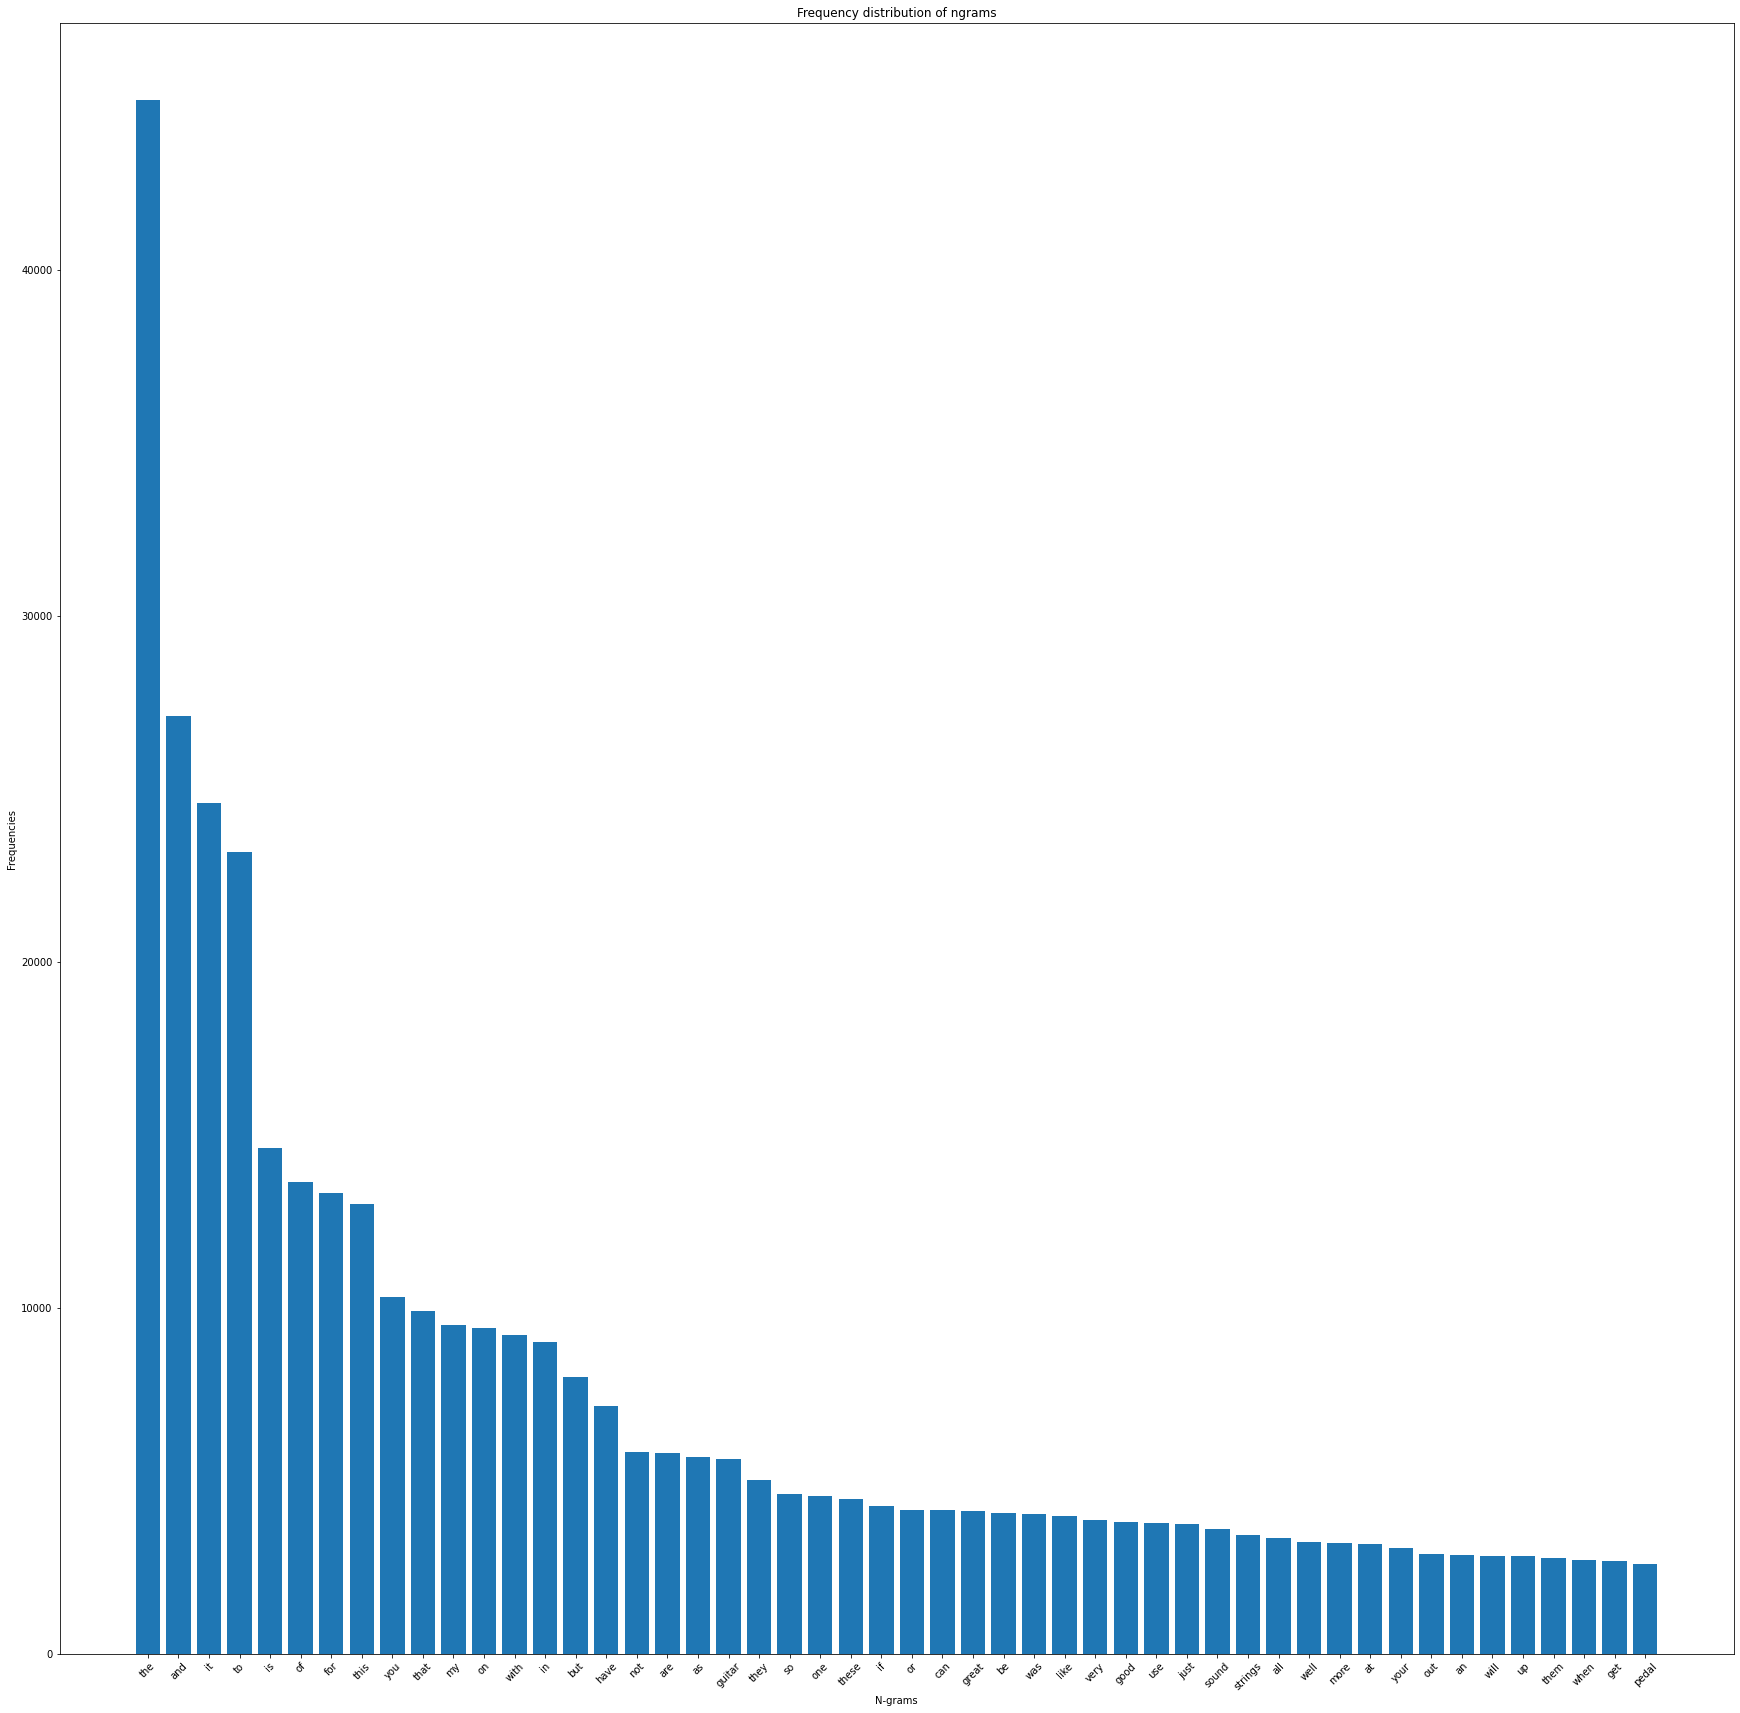

In [44]:
#plot graph that will show the frequency of words occuring in reviewText

vectorizer = CountVectorizer()
# So, we get such structure:
#        | word1  | word2  |  word3 | word4
# text1  |   1    |    1   |   1    |   0
# text2  |   0    |    1   |   1    |   0
# text3  |   2    |    1   |   0    |   0
# text4  |   0    |    0   |   0    |   1
vect_texts = vectorizer.fit_transform(list(data['reviewText']))
# ['word1', 'word2', 'word3', 'word4']
all_ngrams = vectorizer.get_feature_names()
num_ngrams = min(50, len(all_ngrams))
all_counts = vect_texts.sum(axis=0).tolist()[0]

all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = all_ngrams[:num_ngrams]
counts = all_counts[:num_ngrams]

idx = np.arange(num_ngrams)

# Let's now plot a frequency distribution plot of the most seen words in the corpus.
plt.figure(figsize=(30, 30))
plt.bar(idx, counts, width=0.8)
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of ngrams')
plt.xticks(idx, ngrams, rotation=45)
plt.show()

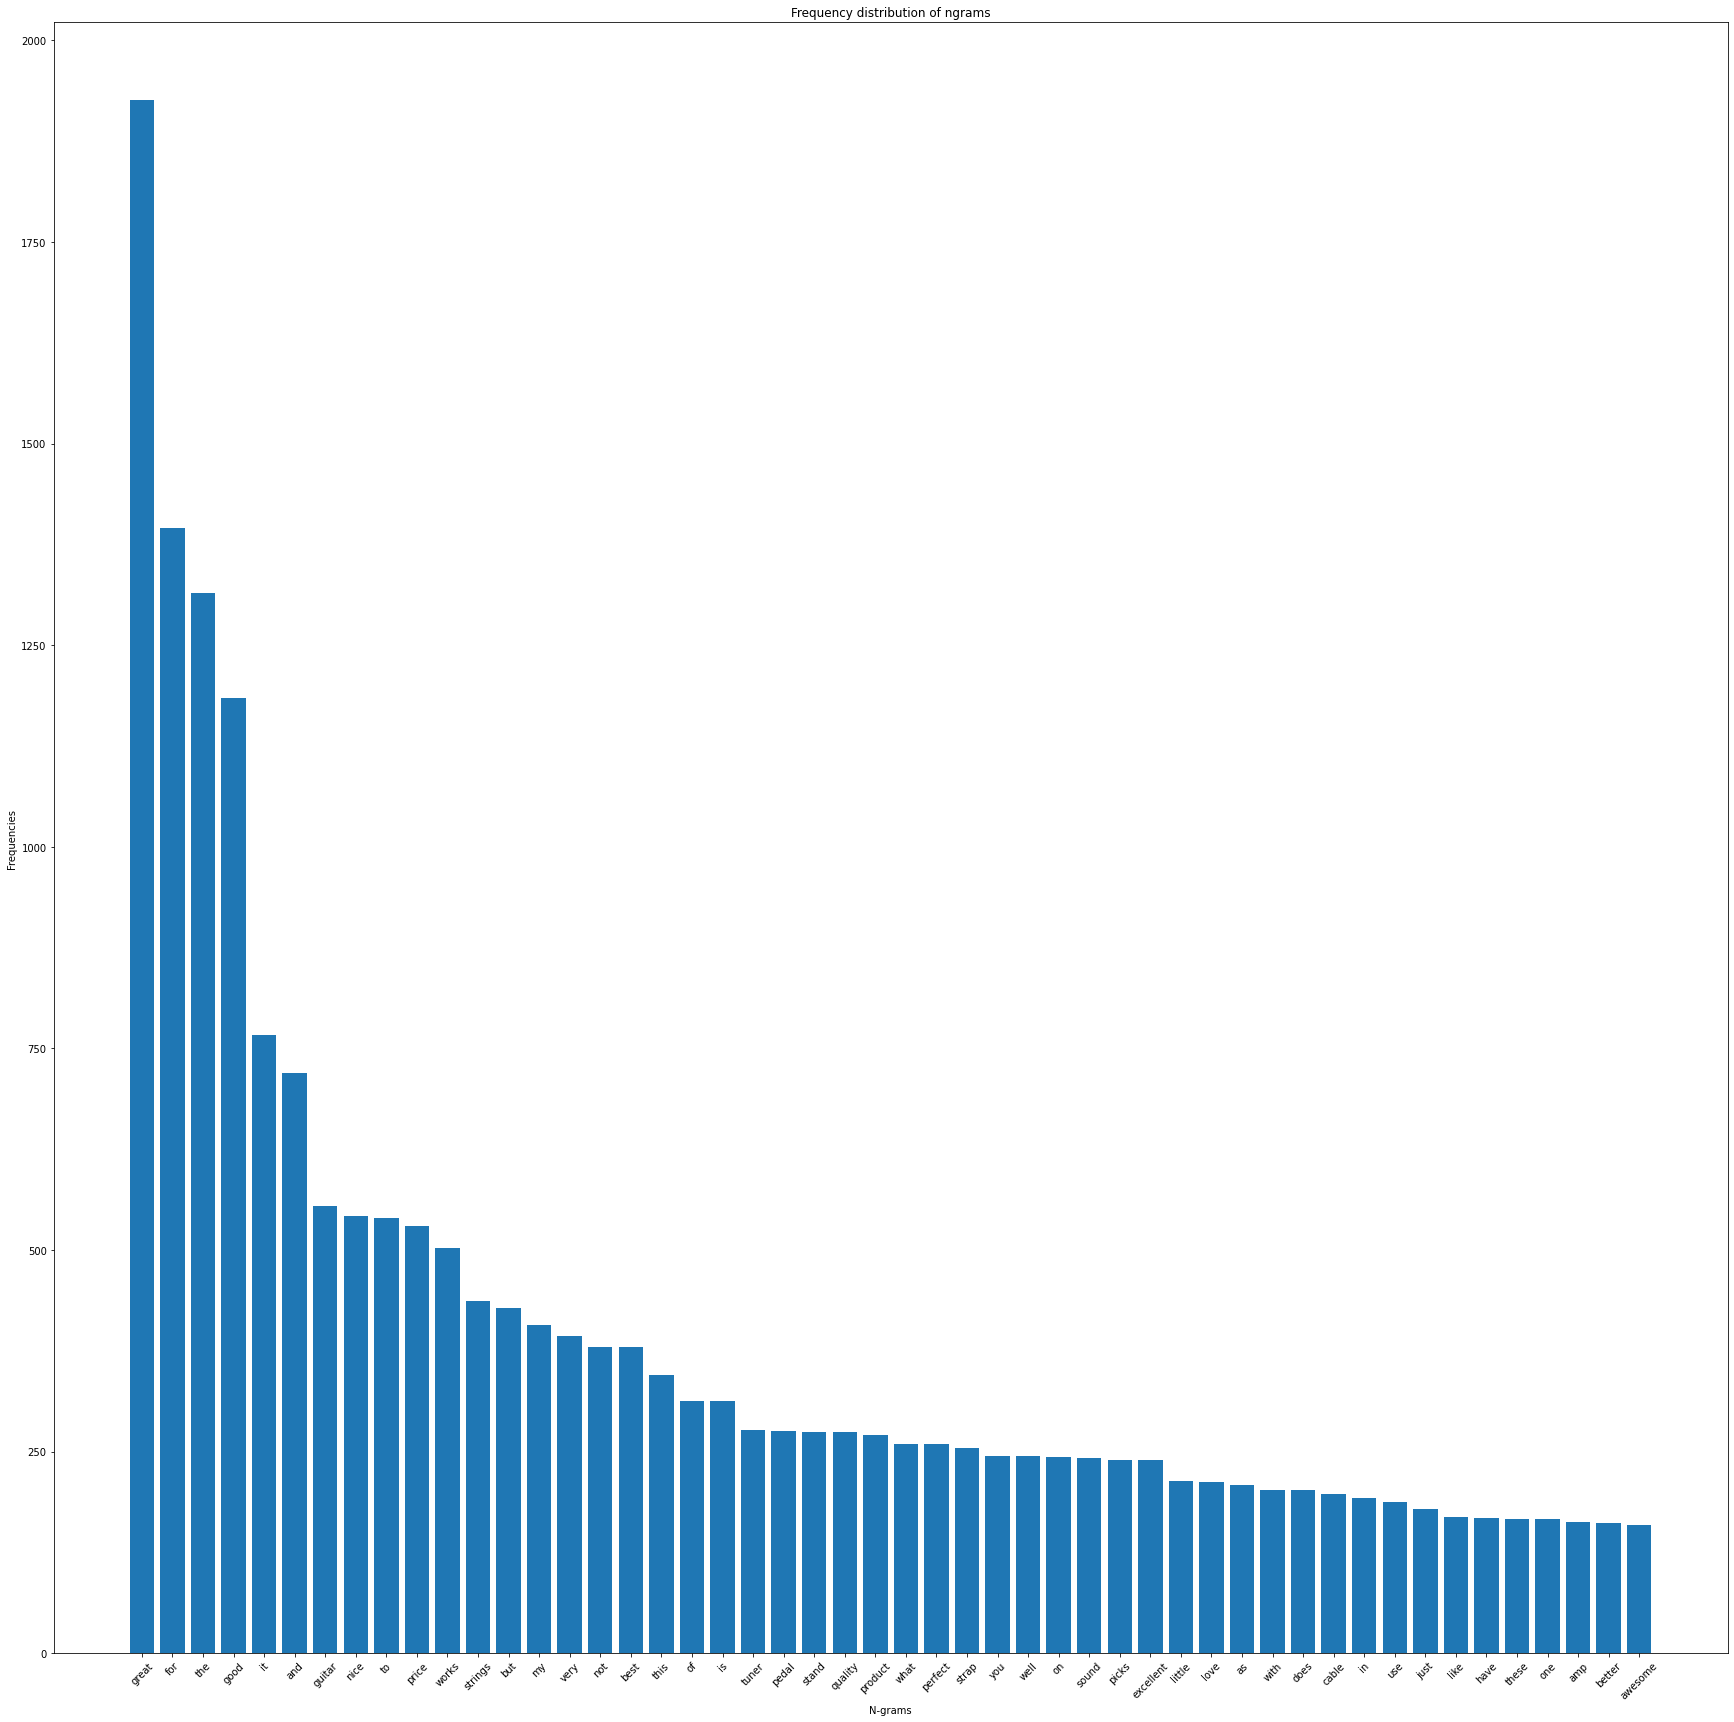

In [45]:
#plot graph that will show the frequency of words occuring in summary

vectorizer = CountVectorizer()
# So, we get such structure:
#        | word1  | word2  |  word3 | word4
# text1  |   1    |    1   |   1    |   0
# text2  |   0    |    1   |   1    |   0
# text3  |   2    |    1   |   0    |   0
# text4  |   0    |    0   |   0    |   1
vect_texts = vectorizer.fit_transform(list(data['summary']))
# ['word1', 'word2', 'word3', 'word4']
all_ngrams = vectorizer.get_feature_names()
num_ngrams = min(50, len(all_ngrams))
all_counts = vect_texts.sum(axis=0).tolist()[0]

all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = all_ngrams[:num_ngrams]
counts = all_counts[:num_ngrams]

idx = np.arange(num_ngrams)

# Let's now plot a frequency distribution plot of the most seen words in the corpus.
plt.figure(figsize=(30, 30))
plt.bar(idx, counts, width=0.8)
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of ngrams')
plt.xticks(idx, ngrams, rotation=45)
plt.show()

## **Preprocessing Data**

**Spliting data set as train and test**

In [0]:
# Accretion of data from reviewText and summary and storing in variable
X = data['reviewText'] + ' ' + data['summary']
y = data['overall']

In [0]:
# Converting variable into Numpy array with string
X = X.astype(str)
X=X.to_numpy()
y=y.to_numpy()

In [0]:
# Split data in train and test with 50 % test data
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split( X, y, test_size=0.5, random_state=42)

In [49]:
# Display the shape of training sentence and testing sentences
print(np.shape(testing_sentences))
print(np.shape(training_sentences))

(5131,)
(5130,)


**Defining variable**

Vocab_size : Upper limit of diffrent words (  Note that the vocab_size is specified large enough so as to ensure unique integer encoding for each and every word.)

max_length : What will be the maximum length of sentence

trunc_type : If sentence exceed max_length then where to truncate a sentence from begining or at end using 'post and 'pre' methods


In [0]:
# these variable value can be changed you should change and see the diffrence in the model.

vocab_size=10000 
embedding_dim=16
max_length=120
trunc_type='post' # It can be changed to pre and then see the diffrence in accuracy
oov_tok='<OOV>'


**Tokenize sequence**

 Tokenization is the task of chopping it up into pieces, called tokens.

 Eg.
 Input - How are you

 Output - 'How', 'are', 'you' 

 Here is a sample python code for better understanding



```
 sentences = [
    'I love my dog',
    'I love my cat so much',
    'You love my dog!'
]

Create object of Tokenizer and tokenize sentences

tokenizer = Tokenizer(num_words = 100)  # max distinct words first 100 words
tokenizer.fit_on_texts(sentences)
```




In [0]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

**Text to sequence**


texts_to_sequences Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.

Here two function will require text_to_sequences and word_index

In [0]:

word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(training_sentences)

**Example of text to sequence**

Here we have printed the first train sentence in text as well as with its corresponding integer that we have converted using text_to_sequence mothod in above cell.

In [53]:
print(sequences[0])
print(training_sentences[0])

[4, 80, 7, 6, 237, 165, 2, 39, 13, 12, 140, 143, 4, 1462, 2, 1749, 1426, 389, 328, 9, 17, 655, 60, 9, 12, 722, 97, 140]
I used it to hold down the strings on my bass while I adjusted the truss rod. Worked perfectly for that purpose. Works for my four string bass


**Padding sequence**

The pad_sequences() function in the Keras deep learning library can be used to pad variable length sequences.

The pad_sequences() function can also be used to pad sequences to a preferred length that may be longer than any observed sequences.

This can be done by specifying the “maxlen” argument to the desired length. Padding will then be performed on all sequences to achieve the desired length, as follows.

A sample python code is given below for better understanding.



```
padded_sequences = pad_sequences(sequences, padding='post',truncating='post',maxlen=5)

```



In [0]:

padded=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length)

**Compairing padded sequence with normal sequence**

In below cell we can see that in padded output  0 are added in starting so that the length will get uniformed as we have defined using max_length variable.

In [55]:
print(sequences[500])
print(padded[500])

[4, 80, 7, 6, 2263, 4, 115, 810, 21, 39, 5, 2263, 4, 115, 248, 5, 6887, 12, 136, 323, 2, 934, 8, 148, 58, 4013, 352, 10, 472, 58, 2510, 10, 2, 21, 1902, 391, 148, 148, 9334]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    4   80    7
    6 2263    4  115  810   21   39    5 2263    4  115  248    5 6887
   12  136  323    2  934    8  148   58 4013  352   10  472   58 2510
   10    2   21 1902  391  148  148 9334]


**Integer value corresponding to words**

In the below cell there is the list of diffrent words with their corresponding unique index value which we have created using text_to_sequences function in one of the above cell.

It can be printed using word_index method

In [56]:
tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 'a': 3,
 'i': 4,
 'and': 5,
 'to': 6,
 'it': 7,
 'is': 8,
 'for': 9,
 'of': 10,
 'this': 11,
 'my': 12,
 'on': 13,
 'with': 14,
 'you': 15,
 'in': 16,
 'that': 17,
 'but': 18,
 'have': 19,
 'not': 20,
 'guitar': 21,
 'great': 22,
 'are': 23,
 'as': 24,
 'good': 25,
 'so': 26,
 'they': 27,
 'these': 28,
 'one': 29,
 'if': 30,
 'very': 31,
 'or': 32,
 'like': 33,
 'be': 34,
 'was': 35,
 'use': 36,
 'just': 37,
 'sound': 38,
 'strings': 39,
 "it's": 40,
 'well': 41,
 'can': 42,
 'all': 43,
 'more': 44,
 'at': 45,
 'your': 46,
 'up': 47,
 'an': 48,
 'out': 49,
 'will': 50,
 'price': 51,
 'pedal': 52,
 'get': 53,
 'when': 54,
 'them': 55,
 'from': 56,
 'than': 57,
 'no': 58,
 'me': 59,
 'works': 60,
 'has': 61,
 'would': 62,
 'really': 63,
 'amp': 64,
 'nice': 65,
 'what': 66,
 'little': 67,
 'quality': 68,
 'some': 69,
 'other': 70,
 'about': 71,
 'do': 72,
 'much': 73,
 "don't": 74,
 'had': 75,
 "i've": 76,
 'only': 77,
 'there': 78,
 'also': 79,
 'used': 80,
 'wh

##**Model Building**

Here we have used LSTM algorithm

 ***What is LSTM ?***

LSTM stands for long short term memory. It is a model or architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have ‘short term memory’ in that they use persistent previous information to be used in the current neural network. Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node.

 
**No. of layers**

We have used 6 hidden layers and 3 output layer with hidden layer activation function as sigmoid and output layer activation function as sigmoid.




In [0]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [0]:
#Categorize training_labels and testing_labels as we are using multiclass classification
from keras.utils import to_categorical
training_labels = to_categorical(training_labels)
testing_labels = to_categorical(testing_labels)


In [61]:
##Summary of model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 21        
Total params: 172,955
Trainable params: 172,955
Non-trainable params: 0
_________________________________________________________________


##**Training and validating model**

1.   We have used 5 epochs to train
2.   No of training data = No of validating data = 5130



In [59]:
num_epochs = 5
history=model.fit(padded, training_labels, epochs=num_epochs, batch_size =32, validation_data=(testing_padded, testing_labels))

Epoch 1/5
161/161 [==============================] - 13s 83ms/step - loss: 0.7252 - accuracy: 0.8287 - val_loss: 0.5784 - val_accuracy: 0.8784
Epoch 2/5
161/161 [==============================] - 13s 80ms/step - loss: 0.5162 - accuracy: 0.8801 - val_loss: 0.4796 - val_accuracy: 0.8784
Epoch 3/5
161/161 [==============================] - 13s 80ms/step - loss: 0.4578 - accuracy: 0.8801 - val_loss: 0.4487 - val_accuracy: 0.8784
Epoch 4/5
161/161 [==============================] - 13s 81ms/step - loss: 0.4370 - accuracy: 0.8801 - val_loss: 0.4361 - val_accuracy: 0.8784
Epoch 5/5
161/161 [==============================] - 13s 81ms/step - loss: 0.4267 - accuracy: 0.8801 - val_loss: 0.4284 - val_accuracy: 0.8784


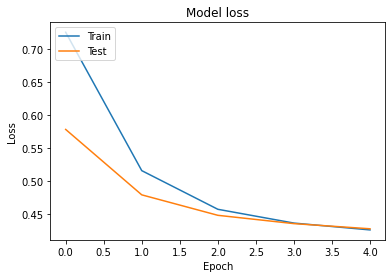

In [60]:
#Plot loss and validation loss graph using history method
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##**Conclusion**

We have implemented LSTM RNN model in our dataet after preprocessing the dataset and concluded that the validating accuracy is **87 %**. 

which can further be increased by applying diffrent algorithm and using k fold technique in our dataset.